In [1]:
import numpy as np
import networkLibraries as mylib
import errorFunctions as myerr
import activationFunctions as myact
import datasets as ds
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
#Costruzione path
current_path = os.getcwd()
data_path = os.path.join(current_path, 'Data')
train_file_path = os.path.join(data_path, "mnist_train.csv")
test_file_path = os.path.join(data_path, "mnist_test.csv")

In [3]:
#Lettura csv
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [4]:
#Ottenimento array per il training e il testing
train_array = np.array(train_data)
test_array = np.array(test_data)

In [5]:
#Estrapoliamo il numero di righe e di colonne di train e test
m, n = train_array.shape 
mtest, ntest = test_array.shape  

np.random.shuffle(train_array)  # Mescola casualmente i dati prima di suddividerli in set di sviluppo e training

In [6]:
Xval, Yval = ds.get_mnist_validation(train_array, n)
Xtrain, Ytrain = ds.get_mnist_training(train_array, n, m)
Xtest, Ytest = ds.get_mnist_testing(test_array, ntest, mtest)
print(Xtrain.shape, Ytrain.shape, Xval.shape, Yval.shape, Xtest.shape, Ytest.shape)

(784, 47999) (10, 47999) (784, 11999) (10, 11999) (784, 9999) (10, 9999)


In [7]:
#A neural network with just one hidden layer is created
NUM_HIDDEN_NEURONS=[50, 50, 50, 50, 50]
mia_net=mylib.new_network(Xtrain.shape[0],NUM_HIDDEN_NEURONS,Ytrain.shape[0])
#mylib.set_activation_function(mia_net, activation_function=myact.tanh, layer_type=1)
#mylib.set_activation_function(mia_net, activation_function=myact.relu, layer_type=1)
mylib.set_activation_function(mia_net, activation_function=myact.leaky_relu, layer_type=1)
mylib.get_net_structure(mia_net,show=1)

num_hidden_layers:  5
input_size:  784
output_size:  10
neurons in hidden layers:
50
50
50
50
50
activation functions:
relu
relu
relu
relu
relu
identity


In [8]:
#A copy of the network is made, so one can restore the original neural network,
# if one wants
train_mia_net=mylib.duplicateNetwork(mia_net)
mylib.get_net_structure(train_mia_net,show=1)

num_hidden_layers:  5
input_size:  784
output_size:  10
neurons in hidden layers:
50
50
50
50
50
activation functions:
relu
relu
relu
relu
relu
identity


In [9]:

#batch training
err,errV=mylib.trainingPhase(train_mia_net,Xtrain,Ytrain,Xval,Yval,maxNumEpoches=150,errFun= myerr.crossEntropyMCSoftMax,eta=0.00001)

Epoch: 0 Train Err: 110521.91108558883 Train Accuracy: 0.10437717452446926 Val Err: 27628.791862517806 Val Accuracy: 0.10450870905908825


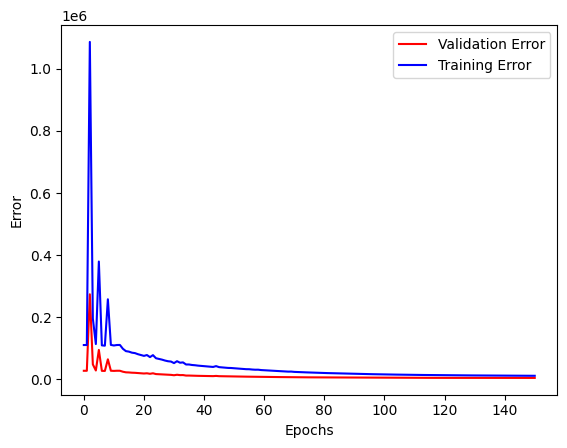

In [10]:
plt.figure()
plt.plot(errV, 'r', label='Validation Error')
plt.plot(err, 'b', label='Training Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [11]:
#Accuracy on both the training and test set
acc=mylib.netAccuracy(train_mia_net,Xtest,Ytest)
print('test accuracy: ',acc)
acc=mylib.netAccuracy(train_mia_net,Xtrain,Ytrain)
print('train accuracy: ',acc)

test accuracy:  0.8014801480148015
train accuracy:  0.9264568011833579
